In [1]:
from keras import backend as K

/sw/centos/anaconda3/5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [45]:
K.tensorflow_backend._get_available_gpus()


['/job:localhost/replica:0/task:0/device:GPU:0']

In [46]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
import random
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras import utils
from keras.models import Sequential
from keras.layers import concatenate, Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, Input, MaxPooling2D,Concatenate
%matplotlib inline

In [3]:
CSV_PATH="data/subtrainLabls.csv"
ngram_PATH="3gramfeature.csv"
IMG_PREFIX="data/subtrain"
class_name=['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']

In [4]:
df_label = pd.read_csv(CSV_PATH)
df_ngram = pd.read_csv(ngram_PATH)

In [54]:
df_label[:10]

,Id,Class
0,KCeDuY5B0SUjlfxbT3X8,1
1,FbHh56UTgNAQlPsKOudE,1
2,Aa9zCWtbpOo750IlMRdY,1
3,0AwWs42SUQ19mI7eDcTC,1
4,adHqeXxjBJVt9KD7obTZ,1
5,fEMdwkrczmt7j0RTL14J,1
6,FftMq5zTYhDgRyxv3wBC,1
7,FGktWH4PKIdNimlo0B6Q,1
8,0KigmP9TLwJXNGz26tfO,1
9,fhPezOdViLjBl7pyaFNw,1


In [6]:
df_ngram[:10]

,Id,"('push', 'push', 'xor')","('push', 'xor', 'mov')","('xor', 'mov', 'jmp')","('mov', 'jmp', 'push')","('jmp', 'push', 'push')","('push', 'push', 'mov')","('push', 'mov', 'push')","('mov', 'push', 'push')","('push', 'push', 'push')",...,"('pop', 'sbb', 'xor')","('call', 'lea', 'sbb')","('and', 'sbb', 'lea')","('test', 'jnz', 'sbb')","('lea', 'sbb', 'test')","('movzx', 'movzx', 'sbb')","('lea', 'sbb', 'sbb')","('add', 'sbb', 'lea')","('sbb', 'lea', 'sbb')","('xor', 'lea', 'sbb')"
0,KCeDuY5B0SUjlfxbT3X8,49,29,9,124,178,350,411,492,1799,...,0,0,0,0,0,0,0,0,0,0
1,FbHh56UTgNAQlPsKOudE,1,0,2,13,19,3,15,11,56,...,0,0,0,0,0,0,0,0,0,0
2,Aa9zCWtbpOo750IlMRdY,1,0,0,0,0,3,23,2,49,...,0,0,0,0,0,0,0,0,0,0
3,0AwWs42SUQ19mI7eDcTC,16,7,1,23,43,211,425,180,288,...,0,0,0,0,0,0,0,0,0,0
4,adHqeXxjBJVt9KD7obTZ,1,0,2,13,18,4,13,10,54,...,0,0,0,0,0,0,0,0,0,0
5,fEMdwkrczmt7j0RTL14J,2,1,0,1,1,10,13,4,32,...,0,0,0,0,0,0,0,0,0,0
6,FftMq5zTYhDgRyxv3wBC,0,0,0,0,1,1,4,5,4,...,0,0,0,0,0,0,0,0,0,0
7,FGktWH4PKIdNimlo0B6Q,2,1,0,0,1,14,29,18,23,...,0,0,0,0,0,0,0,0,0,0
8,0KigmP9TLwJXNGz26tfO,169,86,15,96,76,3400,2107,3431,4479,...,0,0,0,0,0,0,0,0,0,0
9,fhPezOdViLjBl7pyaFNw,2,0,2,12,19,4,15,10,54,...,0,0,0,0,0,0,0,0,0,0


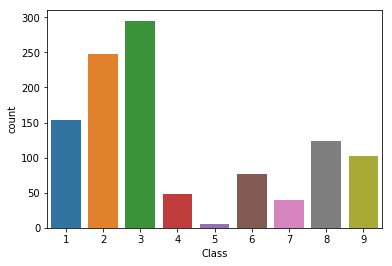

1 - Ramnit  
2 - Lollipop  
3 - Kelihos_ver3  
4 - Vundo  
5 - Simda  
6 - Tracur  
7 - Kelihos_ver1  
8 - Obfuscator.ACY  
9 - Gatak  


In [43]:
ax = sns.countplot(df_label['Class'])
#plt.legend(labels=class_name)
plt.show()
for i in range(len(class_name)):
    print(i+1,"-",class_name[i]," ")


In [44]:
def show_img(df):
    index = random.randint(1,len(df)) - 1
    _id,virus_class=df.iloc[index]
    img_path = IMG_PREFIX+"/"+_id+".png"
    return img_path,class_name[virus_class]
    #plt.imshow(image0)
    #img_path = IMG_PREFIX+""
    

Vundo


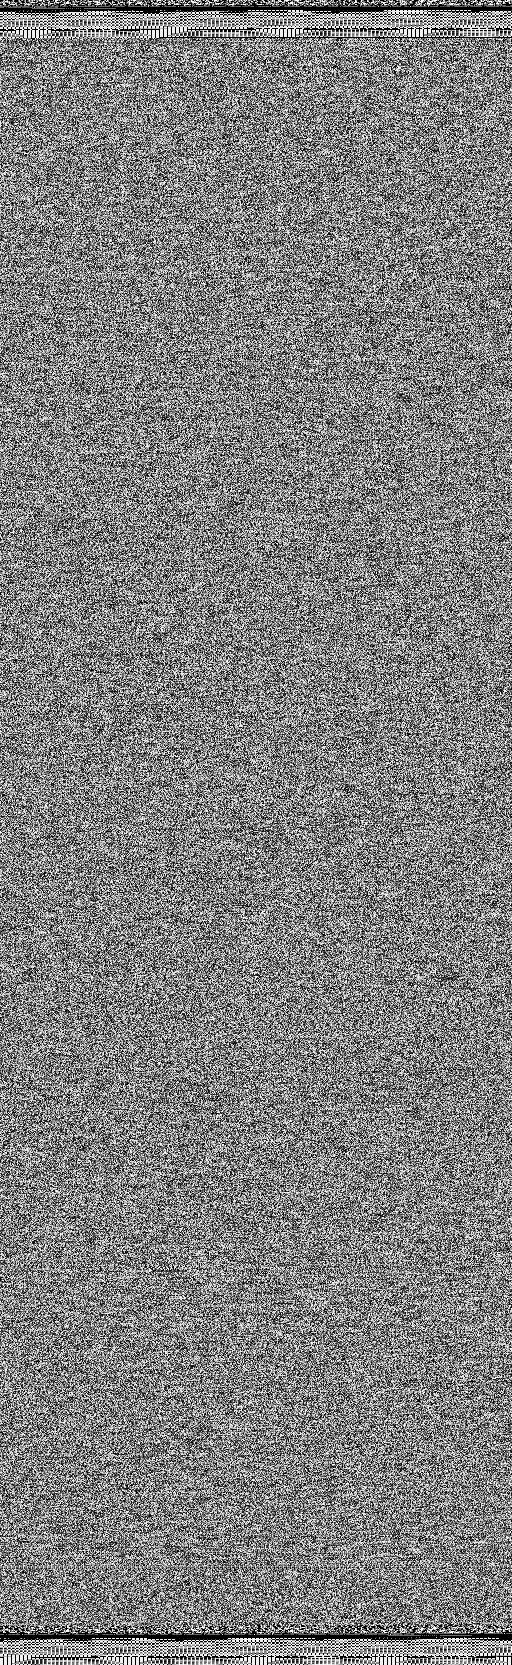

In [56]:
img_path,virus_class=show_img(df_label)
image0=Image.open(img_path)
print(virus_class)
image0

In [46]:
def get_img_path(df_label):
    all_img_path=[]
    for i in range(len(df_label)):
        _id,virus_class=df_label.iloc[i]
        all_img_path.append(IMG_PREFIX+"/"+_id+".png")
        #print(_id,virus_class)
    return all_img_path


In [47]:
all_img_path=get_img_path(df_label)
#all_img_path

In [48]:
def load_training(path):
    x = []
    for i in range(len(path)):
        
        img = load_img(path[i],color_mode="grayscale",target_size=(224,224))
        img_array = img_to_array(img)
        #img = load_img(path[i],color_mode="rgb")

        #img_arr = np.array(img_to_array(img)).astype('float32')/255
        #rgb_array = np.zeros((img_arr.shape[0], img_arr.shape[1], 3), "uint8")
        #rgb_array[:, :, 0], rgb_array[:, :, 1], rgb_array[:, :, 2] = img_arr, img_arr, img_arr

        
        #x.append(np.array(img_arr).astype('float32')/255)
        #img_array = img_array.astype('float32')/255
        #x= np.append(x,np.array(img_arr).astype('float32')/255)
        #print(x[-1])
        x.append(np.array(img_array))
        #if (i//200):
        #    print("load",path[i])
        #    print(type(img))
        #    print(img_array.dtype)
        #    print(img_array.shape)
            
    return x
    
    

In [60]:
x=load_training(all_img_path)

In [5]:
y, class_names = pd.factorize(df_label['Class'])
y = utils.to_categorical(y)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [64]:
x = np.asarray(x)
x = x.astype("float32") / 255
#x = x.reshape((len(x), np.prod(x.shape[1:])))
#x

# split set for binary exe

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [18]:
#mlp_input=Input(shape=(512*512,))
#mlp = Dense(units=1024, activation='relu')(mlp_input)
#mlp = Dense(units=1024, activation='relu')(mlp)
#mlp = Dense(units=10,activation='relu')(mlp)
#mlp_model = Model(inputs=mlp_input)

In [70]:
"""
mlp = Sequential()
mlp.add(Dense(units=1024, activation="relu", input_shape=(512*512,))) 
mlp.add(Dense(units=1024, activation="relu")) 
mlp.add(Dense(units=9, activation="relu"))
mlp.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
mlp.summary()
"""

'\nmlp = Sequential()\nmlp.add(Dense(units=1024, activation="relu", input_shape=(512*512,))) \nmlp.add(Dense(units=1024, activation="relu")) \nmlp.add(Dense(units=9, activation="relu"))\nmlp.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])\nmlp.summary()\n'

In [71]:
#history = mlp.fit(x=X_train, y=y_train, batch_size=16, epochs=50, validation_split=0.1)

In [16]:
def plot_acc(history):
# plot the training accuracy
    plt.plot(history.history["acc"])
    plt.plot(history.history["val_acc"])
    plt.title("Training Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Training", "Validation"], loc="upper left")
    plt.show()
    
    # plot the training loss
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Training Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Training", "Validation"], loc="upper left")
    #plt.savefig(where+'_loss.png')
    plt.show()
#plot_acc(history)

In [73]:
from keras.applications.vgg16 import VGG16

img_size_target = 224
img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])
model = VGG16(input_tensor=img_conc,classes=9,weights=None)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 224, 224, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        concatenate_1[0][0]              
__________________________________________________________________________________________________
block1_con

In [74]:
utils.plot_model(model, to_file='vgg16.png')
IPython.display.Image('vgg16.png')

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [75]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x=X_train, y=y_train, batch_size=16, epochs=50, validation_split=0.1)

Train on 882 samples, validate on 99 samples
Epoch 1/50
882/882 [==============================] - 47s 54ms/step - loss: 2.1472 - acc: 0.2642 - val_loss: 2.0447 - val_acc: 0.2525
Epoch 2/50
882/882 [==============================] - 17s 19ms/step - loss: 1.9579 - acc: 0.2698 - val_loss: 1.8671 - val_acc: 0.2525
Epoch 3/50
882/882 [==============================] - 17s 19ms/step - loss: 1.9091 - acc: 0.2789 - val_loss: 1.8701 - val_acc: 0.1717
Epoch 4/50
882/882 [==============================] - 16s 19ms/step - loss: 1.8791 - acc: 0.2676 - val_loss: 2.0480 - val_acc: 0.3232
Epoch 5/50
882/882 [==============================] - 17s 19ms/step - loss: 1.8108 - acc: 0.3617 - val_loss: 2.6657 - val_acc: 0.4545
Epoch 6/50
882/882 [==============================] - 17s 19ms/step - loss: 2.0386 - acc: 0.3492 - val_loss: 1.6645 - val_acc: 0.3535
Epoch 7/50
882/882 [==============================] - 16s 19ms/step - loss: 1.5622 - acc: 0.4864 - val_loss: 1.6557 - val_acc: 0.4444
Epoch 8/50
882/88

In [76]:
score = model.evaluate(x=X_test, y=y_test)

print("test loss:     %g" % score[0])
print("test accuracy: %g" % score[1])

110/110 [==============================] - 3s 25ms/step
test loss:     0.890009
test accuracy: 0.9


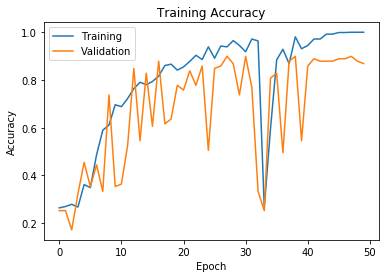

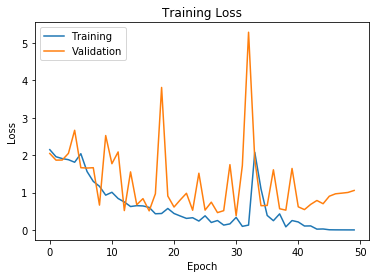

In [77]:
plot_acc(history)

# NGram

In [6]:
ngram_data = df_ngram.copy()
ngram_data.drop(['Id'],axis=1, inplace=True)
ngram_data[:10]

,"('push', 'push', 'xor')","('push', 'xor', 'mov')","('xor', 'mov', 'jmp')","('mov', 'jmp', 'push')","('jmp', 'push', 'push')","('push', 'push', 'mov')","('push', 'mov', 'push')","('mov', 'push', 'push')","('push', 'push', 'push')","('push', 'mov', 'xor')",...,"('pop', 'sbb', 'xor')","('call', 'lea', 'sbb')","('and', 'sbb', 'lea')","('test', 'jnz', 'sbb')","('lea', 'sbb', 'test')","('movzx', 'movzx', 'sbb')","('lea', 'sbb', 'sbb')","('add', 'sbb', 'lea')","('sbb', 'lea', 'sbb')","('xor', 'lea', 'sbb')"
0,49,29,9,124,178,350,411,492,1799,77,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,13,19,3,15,11,56,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,3,23,2,49,0,...,0,0,0,0,0,0,0,0,0,0
3,16,7,1,23,43,211,425,180,288,21,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,13,18,4,13,10,54,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,0,1,1,10,13,4,32,3,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,1,4,5,4,0,...,0,0,0,0,0,0,0,0,0,0
7,2,1,0,0,1,14,29,18,23,0,...,0,0,0,0,0,0,0,0,0,0
8,169,86,15,96,76,3400,2107,3431,4479,462,...,0,0,0,0,0,0,0,0,0,0
9,2,0,2,12,19,4,15,10,54,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
scaler = sklearn.preprocessing.MinMaxScaler()
ngram_data[ngram_data.columns] = scaler.fit_transform(ngram_data[ngram_data.columns])


In [8]:
NUM_DIM_MLP = len(ngram_data.columns)

In [9]:
ngram_X_train, ngram_X_test, ngram_y_train, ngram_y_test = train_test_split(ngram_data, y, test_size=0.1)

In [10]:
ngram_X_train[:10]

,"('push', 'push', 'xor')","('push', 'xor', 'mov')","('xor', 'mov', 'jmp')","('mov', 'jmp', 'push')","('jmp', 'push', 'push')","('push', 'push', 'mov')","('push', 'mov', 'push')","('mov', 'push', 'push')","('push', 'push', 'push')","('push', 'mov', 'xor')",...,"('pop', 'sbb', 'xor')","('call', 'lea', 'sbb')","('and', 'sbb', 'lea')","('test', 'jnz', 'sbb')","('lea', 'sbb', 'test')","('movzx', 'movzx', 'sbb')","('lea', 'sbb', 'sbb')","('add', 'sbb', 'lea')","('sbb', 'lea', 'sbb')","('xor', 'lea', 'sbb')"
960,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.004756,0.003906,0.001695,0.000000,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
883,0.000000,0.000000,0.000000,0.004474,0.003289,0.000470,0.035669,0.001698,0.000539,0.000000,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
726,0.000000,0.000000,0.012195,0.004474,0.000000,0.000470,0.000183,0.001019,0.005931,0.001095,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004390,0.000849,0.006625,0.000000,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
392,0.000000,0.000000,0.000000,0.006711,0.001645,0.006585,0.004573,0.004755,0.003543,0.006572,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
1022,0.008726,0.012195,0.024390,0.015660,0.003289,0.025713,0.020487,0.023264,0.016253,0.013143,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003658,0.000849,0.006470,0.000000,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
399,0.003490,0.000000,0.036585,0.008949,0.009868,0.017560,0.020304,0.017490,0.014636,0.010953,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000157,0.004939,0.001019,0.007934,0.000000,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
1048,0.003490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000170,0.003620,0.000000,...,0.363636,0.333333,0.125,0.125,0.166667,0.285714,0.0,0.0,0.0,0.1


In [11]:
mlp = Sequential()
mlp.add(Dense(units=4096, activation="relu", input_shape=(NUM_DIM_MLP,))) 
mlp.add(Dense(units=4096, activation="relu"))
mlp.add(Dropout(0.1))
mlp.add(Dense(units=4096, activation="relu"))
mlp.add(Dense(units=4096, activation="relu"))
mlp.add(Dropout(0.1))
mlp.add(Dense(units=4096, activation="relu"))
mlp.add(Dense(units=9, activation="softmax"))
mlp.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              36085760  
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              16781312  
__________

In [12]:
mlp_history = mlp.fit(x=ngram_X_train, y=ngram_y_train, batch_size=50, epochs=50, validation_split=0.1)

Train on 882 samples, validate on 99 samples
Epoch 1/50
882/882 [==============================] - 3s 3ms/step - loss: 2.1577 - acc: 0.3651 - val_loss: 2.1020 - val_acc: 0.4242
Epoch 2/50
882/882 [==============================] - 1s 941us/step - loss: 2.0647 - acc: 0.4274 - val_loss: 1.9976 - val_acc: 0.3838
Epoch 3/50
882/882 [==============================] - 1s 920us/step - loss: 1.9616 - acc: 0.3322 - val_loss: 1.8808 - val_acc: 0.3232
Epoch 4/50
882/882 [==============================] - 1s 890us/step - loss: 1.8552 - acc: 0.3163 - val_loss: 1.7683 - val_acc: 0.4444
Epoch 5/50
882/882 [==============================] - 1s 914us/step - loss: 1.7637 - acc: 0.4422 - val_loss: 1.6734 - val_acc: 0.4848
Epoch 6/50
882/882 [==============================] - 1s 950us/step - loss: 1.6863 - acc: 0.4875 - val_loss: 1.5893 - val_acc: 0.4848
Epoch 7/50
882/882 [==============================] - 1s 955us/step - loss: 1.6155 - acc: 0.4966 - val_loss: 1.5135 - val_acc: 0.5354
Epoch 8/50
882/882 

In [15]:
score = mlp.evaluate(x=ngram_X_test, y=ngram_y_test)

print("test loss:     %g" % score[0])
print("test accuracy: %g" % score[1])

110/110 [==============================] - 0s 368us/step
test loss:     0.415999
test accuracy: 0.863636


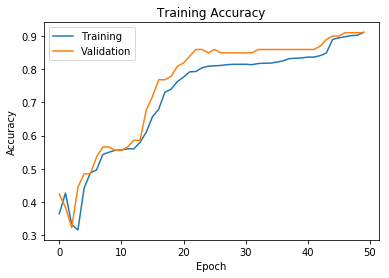

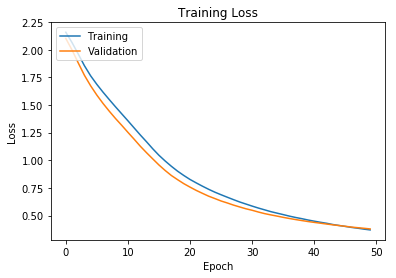

In [17]:
plot_acc(mlp_history)